<a href="https://colab.research.google.com/github/ivancarhuapoma/Projects/blob/main/An%C3%A1lisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CLUSTERING CON EL METODO K-MEANS**




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sb
from sklearn.cluster import KMeans
#from sklearn.metrics import pairwise_distances_argmin_min

In [ ]:
%matplotlib inline
vinos=pd.read_csv('/content/sample_data/caracteristicas de vinos.csv',engine='python')

In [ ]:
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Vino             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
vinos.head()

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:

#eliminando columna vino
vinos_variable = vinos.drop(['Vino'], axis=1)
vinos_variable

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
vinos_variable.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**Normalizacion de los valores de la caracteristicas**


In [ ]:
#restarle a cada celda, el valor minimo que se encuentra en su columna y dividirlo entre la resta del maximo menos el minimo
#de esta manera todas las columnas tendran valor minimo 0 y maximo  1
vinos_norm = (vinos_variable - vinos_variable.min())/(vinos_variable.max()-vinos_variable.min())
vinos_norm

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [ ]:
vinos_norm.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**BÚSQUEDA DE LA CANTIDAD OPTIMA DE CLUSTERS** 

In [ ]:
#CALCULANDO QUE TAN SIMILARES SON LOS INDIVIDUOS DENTRO DE SUS CLUSTERS
#NO HAY CRITERIO DE CLUSTER A CREAR,NI CUALES SON LOS OPTIMOS AL FORMAR
# PARA ELLO SE USA EL METODO DE CODO DE JAMBU
#EL CUAL CONSISTE EN CREAR DIFERENTES CANTIDADES DE CLUSTER Y QUE TAN SIMILARES SON LOS INDIVIDUOS
 #para medir la distancia se usa la suma de cuadrados dentro de cada grupo
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, max_iter=300)
  kmeans.fit(vinos_norm) #kmeans a la base de datos
  wcss.append(kmeans.inertia_)

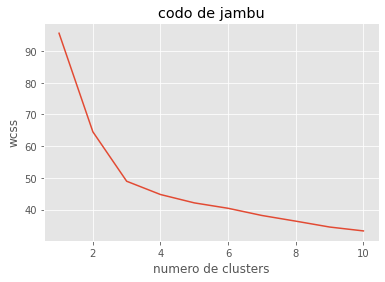

In [ ]:
#graficando los resultados de wcss para formar el codo de jambu
plt.plot(range(1,11), wcss)
plt.title("codo de jambu")
plt.xlabel('numero de clusters')
plt.ylabel('wcss')
#wcss es un indicador de que tan similares son los individuos dentro de los clusters
plt.show()

buscar un punto donde el valor de wcss dejo de disminuir de manera drastica
el cual wcss es 3


**APLICANDO EL METODO K-MEANS A LA BASE DE DATOS**

In [ ]:
clustering = KMeans(n_clusters = 3,max_iter=300) #crea el modelo
clustering.fit(vinos_norm) #aplica el modelo a la BD


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**AGREGANDO LA CLASIFICACION AL ARCHIVO ORIGINAL**

In [ ]:
vinos['KMeans_Clusters'] = clustering.labels_ #los resultados se guardan en labels_ dentro del modelo
vinos.head()

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KMeans_Clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


**VISUALIZANDO LOS CLUSTER QUE SE FORMARON**

Aplicaremos el analisis de componentes principales para darnos una idea de como se formaron los clusters

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_vinos = pca.fit_transform(vinos_norm)
pca_vinos_df = pd.DataFrame(data=pca_vinos,columns=['Componente_1','Componente_2'])
pca_nombres_vinos = pd.concat([pca_vinos_df, vinos[['KMeans_Clusters']]],axis=1)

pca_nombres_vinos

,Componente_1,Componente_2,KMeans_Clusters
0,-0.706336,-0.253193,2
1,-0.484977,-0.008823,2
2,-0.521172,-0.189187,2
3,-0.821644,-0.580906,2
4,-0.202546,-0.059467,2
...,...,...,...
173,0.739510,-0.471901,1
174,0.581781,-0.348366,1
175,0.626313,-0.546857,1
176,0.572991,-0.425516,1


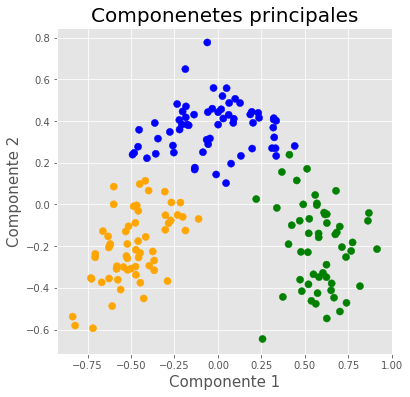

In [ ]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1',fontsize = 15)
ax.set_ylabel('Componente 2',fontsize = 15)
ax.set_title('Componenetes principales',fontsize = 20)

color_theme = np.array(["blue","green","orange"])
ax.scatter(x = pca_nombres_vinos.Componente_1, y= pca_nombres_vinos.Componente_2, c = color_theme[pca_nombres_vinos.KMeans_Clusters],s=50)
plt.show()